In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime

# **Data Preprocessing**

In [5]:
train_df=pd.read_csv('cleaned_data_hourly_20240103.csv')
train_df.head(5)

,county,is_business,product_type,target,is_consumption,datetime,row_id,prediction_unit_id,eic_count,installed_capacity,...,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,108.0,952.89,...,1010.56,54.4,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0
1,0,0,1,96.590,1,2021-09-01 00:00:00,1,0,108.0,952.89,...,1010.56,54.4,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0
2,0,0,2,0.000,0,2021-09-01 00:00:00,2,1,17.0,166.40,...,1010.56,54.4,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0
3,0,0,2,17.314,1,2021-09-01 00:00:00,3,1,17.0,166.40,...,1010.56,54.4,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0
4,0,0,3,2.904,0,2021-09-01 00:00:00,4,2,688.0,7207.88,...,1010.56,54.4,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980802 entries, 0 to 1980801
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   county                     int64  
 1   is_business                int64  
 2   product_type               int64  
 3   target                     float64
 4   is_consumption             int64  
 5   datetime                   object 
 6   row_id                     int64  
 7   prediction_unit_id         int64  
 8   eic_count                  float64
 9   installed_capacity         float64
 10  forecast_date_electricity  object 
 11  date_y                     object 
 12  euros_per_mwh              float64
 13  lowest_price_per_mwh       float64
 14  highest_price_per_mwh      float64
 15  temperature                float64
 16  dewpoint                   float64
 17  rain                       float64
 18  snowfall                   float64
 19  surface_pressure           float64
 20  cl

In [7]:
#Check the missing data
train_df.isnull().sum()

county                       0
is_business                  0
product_type                 0
target                       0
is_consumption               0
datetime                     0
row_id                       0
prediction_unit_id           0
eic_count                    0
installed_capacity           0
forecast_date_electricity    0
date_y                       0
euros_per_mwh                0
lowest_price_per_mwh         0
highest_price_per_mwh        0
temperature                  0
dewpoint                     0
rain                         0
snowfall                     0
surface_pressure             0
cloudcover_total             0
cloudcover_low               0
cloudcover_mid               0
cloudcover_high              0
windspeed_10m                0
winddirection_10m            0
shortwave_radiation          0
direct_solar_radiation       0
diffuse_radiation            0
dtype: int64

**Convert date,hour,year**

In [8]:
train_df['date'] = pd.to_datetime(train_df['datetime']).dt.date
train_df['hour'] = pd.to_datetime(train_df['datetime']).dt.hour
train_df.head()

,county,is_business,product_type,target,is_consumption,datetime,row_id,prediction_unit_id,eic_count,installed_capacity,...,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,date,hour
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,108.0,952.89,...,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0,2021-09-01,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,1,0,108.0,952.89,...,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0,2021-09-01,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,2,1,17.0,166.40,...,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0,2021-09-01,0
3,0,0,2,17.314,1,2021-09-01 00:00:00,3,1,17.0,166.40,...,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0,2021-09-01,0
4,0,0,3,2.904,0,2021-09-01 00:00:00,4,2,688.0,7207.88,...,56.9,3.5,3.9,5.325,342.0,0.0,0.0,0.0,2021-09-01,0


In [9]:
#Check the list of columns
train_df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'row_id', 'prediction_unit_id', 'eic_count',
       'installed_capacity', 'forecast_date_electricity', 'date_y',
       'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure',
       'cloudcover_total', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'winddirection_10m',
       'shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation',
       'date', 'hour'],
      dtype='object')

**SPLIT THE CONSUMPTION & PRODUCTION**

In [10]:
consumption_df=train_df[train_df['is_consumption']==1]
production_df=train_df[train_df['is_consumption']==0]
print(consumption_df.shape)
print(production_df.shape)

(990401, 31)
(990401, 31)


**PLOT THE WEATHER**

IndexError: index 4 is out of bounds for axis 0 with size 4

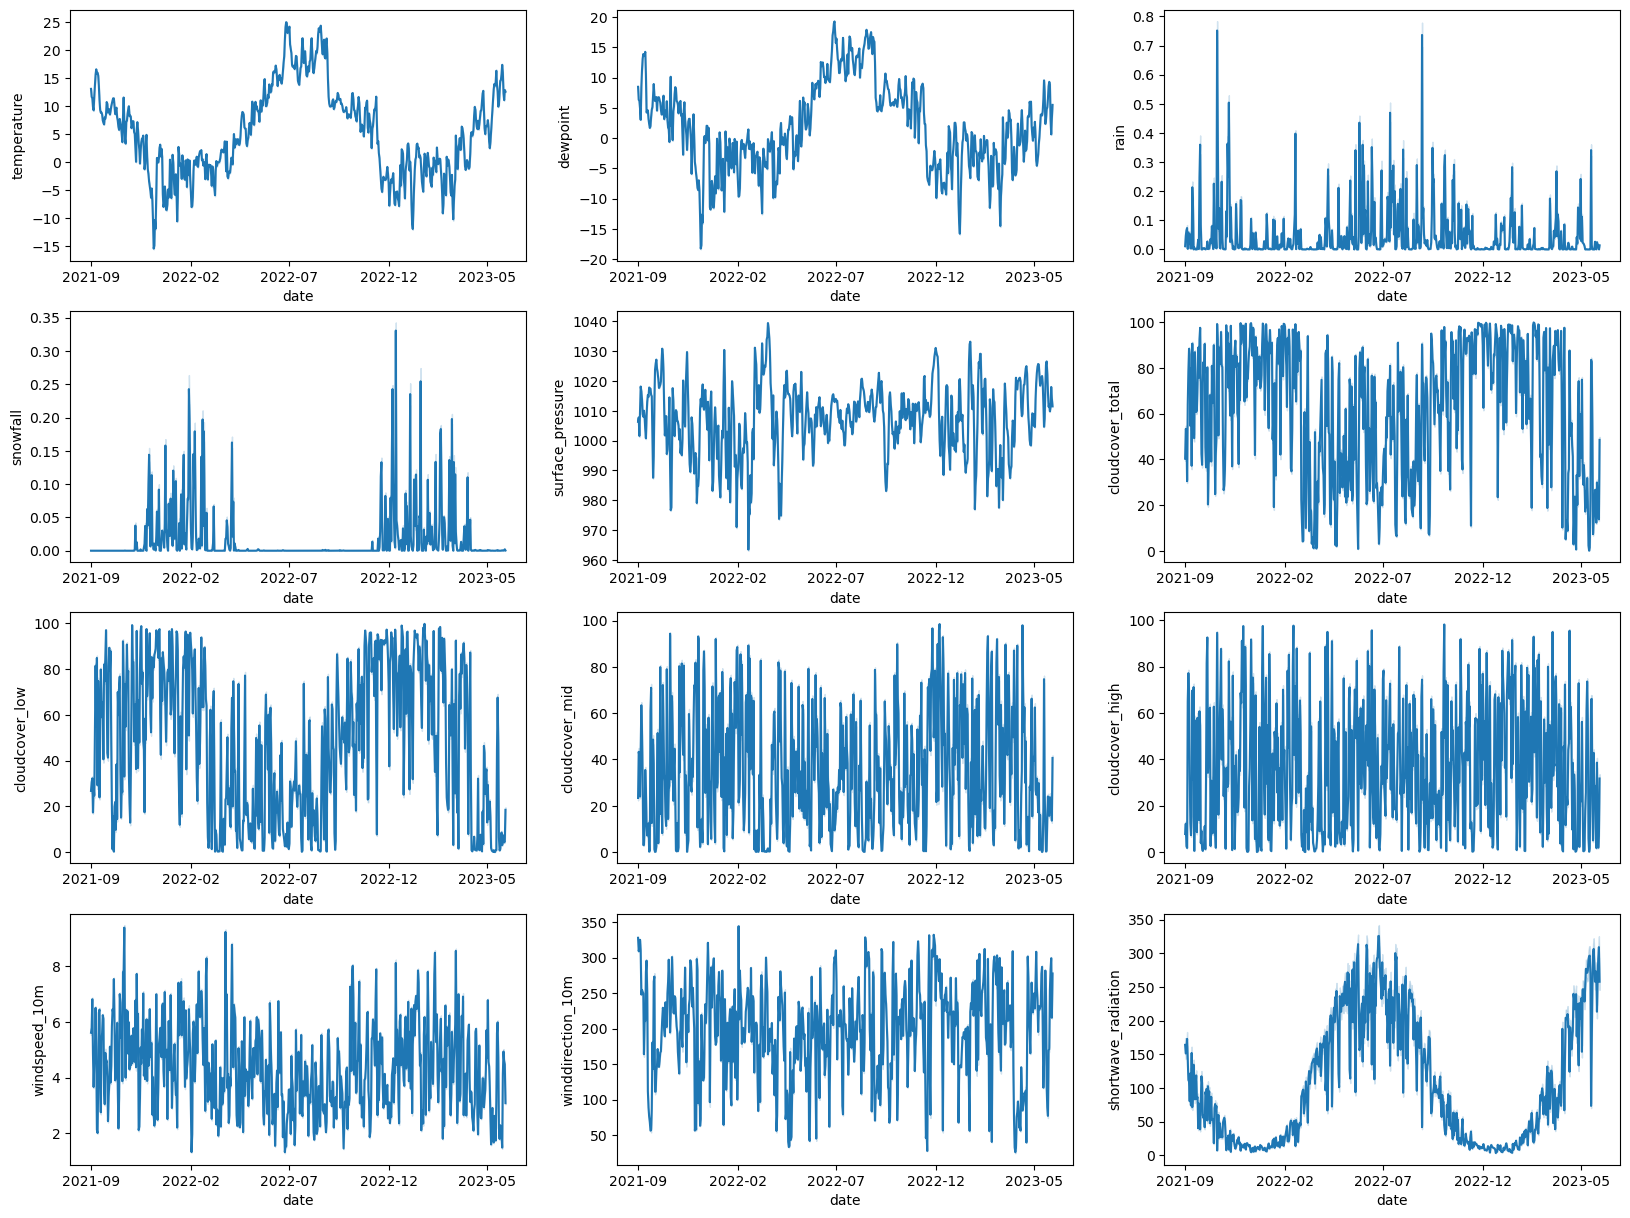

In [12]:
fig, axes = plt.subplots(4,3, figsize = (20,15))
title = 'Some indicators for a randomly chosen station'
for i, indicator in enumerate(['temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure',
       'cloudcover_total', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'winddirection_10m',
       'shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation']):
    ax = axes[i//3, i%3]
    sns.lineplot(data = consumption_df, x = 'date', y = indicator, ax = ax)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

**Consumption**

[Text(0.5, 1.0, 'Consumption MWh'), Text(0, 0.5, 'Output')]

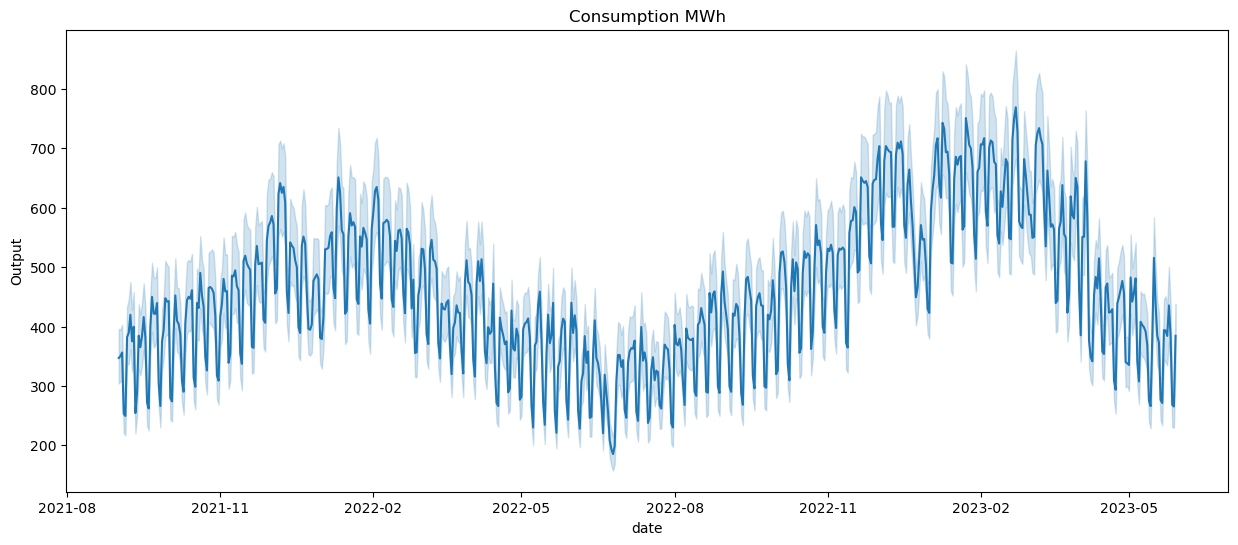

In [13]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data = consumption_df, x = 'date', y = 'target')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set(title = "Consumption MWh", ylabel = 'Output')

**Production**

[Text(0.5, 1.0, 'Production MWh'), Text(0, 0.5, 'Output')]

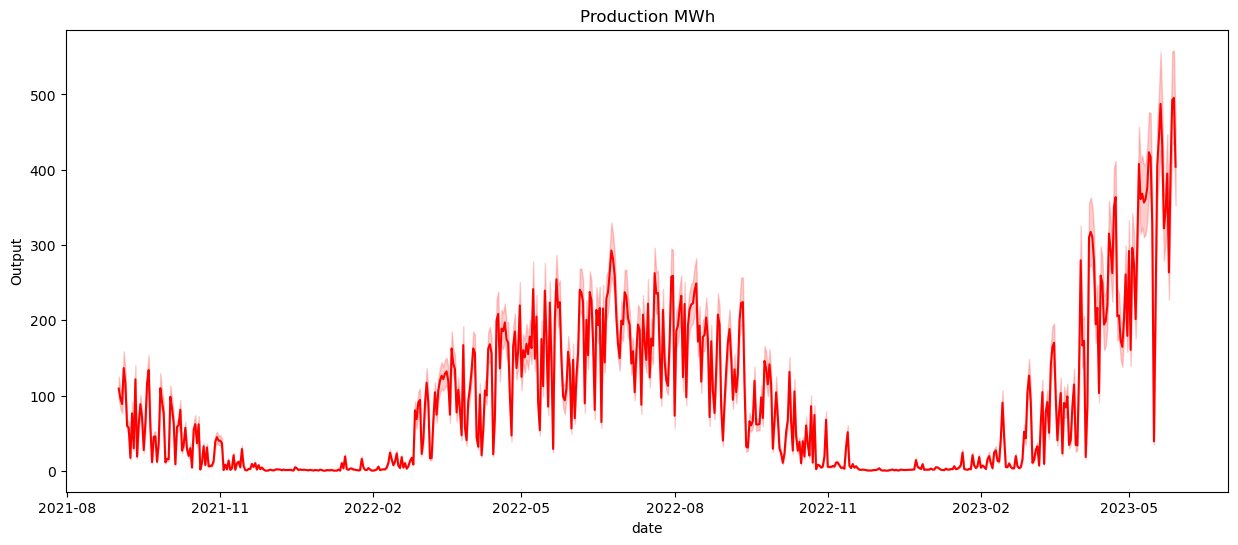

In [14]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data = production_df, x = 'date', y = 'target',color='red')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set(title = "Production MWh", ylabel = 'Output')

In [15]:
consumption_df['date'] = pd.to_datetime(consumption_df['date'])
consumption_df['year'] = consumption_df['date'].dt.year
consumption_df['month'] = consumption_df['date'].dt.month
consumption_df['day'] = consumption_df['date'].dt.day
consumption_df.head(3)

C:\Users\Qayyum Hamidi Alius\AppData\Local\Temp\ipykernel_15148\2771711043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_df['date'] = pd.to_datetime(consumption_df['date'])
C:\Users\Qayyum Hamidi Alius\AppData\Local\Temp\ipykernel_15148\2771711043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_df['year'] = consumption_df['date'].dt.year
C:\Users\Qayyum Hamidi Alius\AppData\Local\Temp\ipykernel_15148\2771711043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

,county,is_business,product_type,target,is_consumption,datetime,row_id,prediction_unit_id,eic_count,installed_capacity,...,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,date,hour,year,month,day
1,0,0,1,96.590,1,2021-09-01 00:00:00,1,0,108.0,952.89,...,5.325,342.0,0.0,0.0,0.0,2021-09-01,0,2021,9,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,3,1,17.0,166.40,...,5.325,342.0,0.0,0.0,0.0,2021-09-01,0,2021,9,1
5,0,0,3,656.859,1,2021-09-01 00:00:00,5,2,688.0,7207.88,...,5.325,342.0,0.0,0.0,0.0,2021-09-01,0,2021,9,1


In [16]:
feature=consumption_df[['installed_capacity','euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure',
       'cloudcover_total', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'winddirection_10m',
       'shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation']]
target=consumption_df['target']

<Axes: >

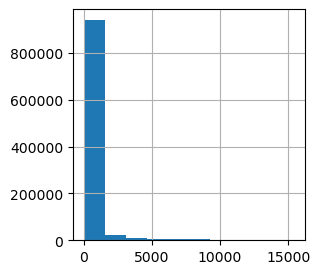

In [17]:
target.hist(figsize=(3,3))

array([[<Axes: title={'center': 'installed_capacity'}>,
        <Axes: title={'center': 'euros_per_mwh'}>,
        <Axes: title={'center': 'lowest_price_per_mwh'}>,
        <Axes: title={'center': 'highest_price_per_mwh'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'dewpoint'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'snowfall'}>],
       [<Axes: title={'center': 'surface_pressure'}>,
        <Axes: title={'center': 'cloudcover_total'}>,
        <Axes: title={'center': 'cloudcover_low'}>,
        <Axes: title={'center': 'cloudcover_mid'}>],
       [<Axes: title={'center': 'cloudcover_high'}>,
        <Axes: title={'center': 'windspeed_10m'}>,
        <Axes: title={'center': 'winddirection_10m'}>,
        <Axes: title={'center': 'shortwave_radiation'}>],
       [<Axes: title={'center': 'direct_solar_radiation'}>,
        <Axes: title={'center': 'diffuse_radiation'}>, <Axes: >,
        <Axes: >]], dtype=object)

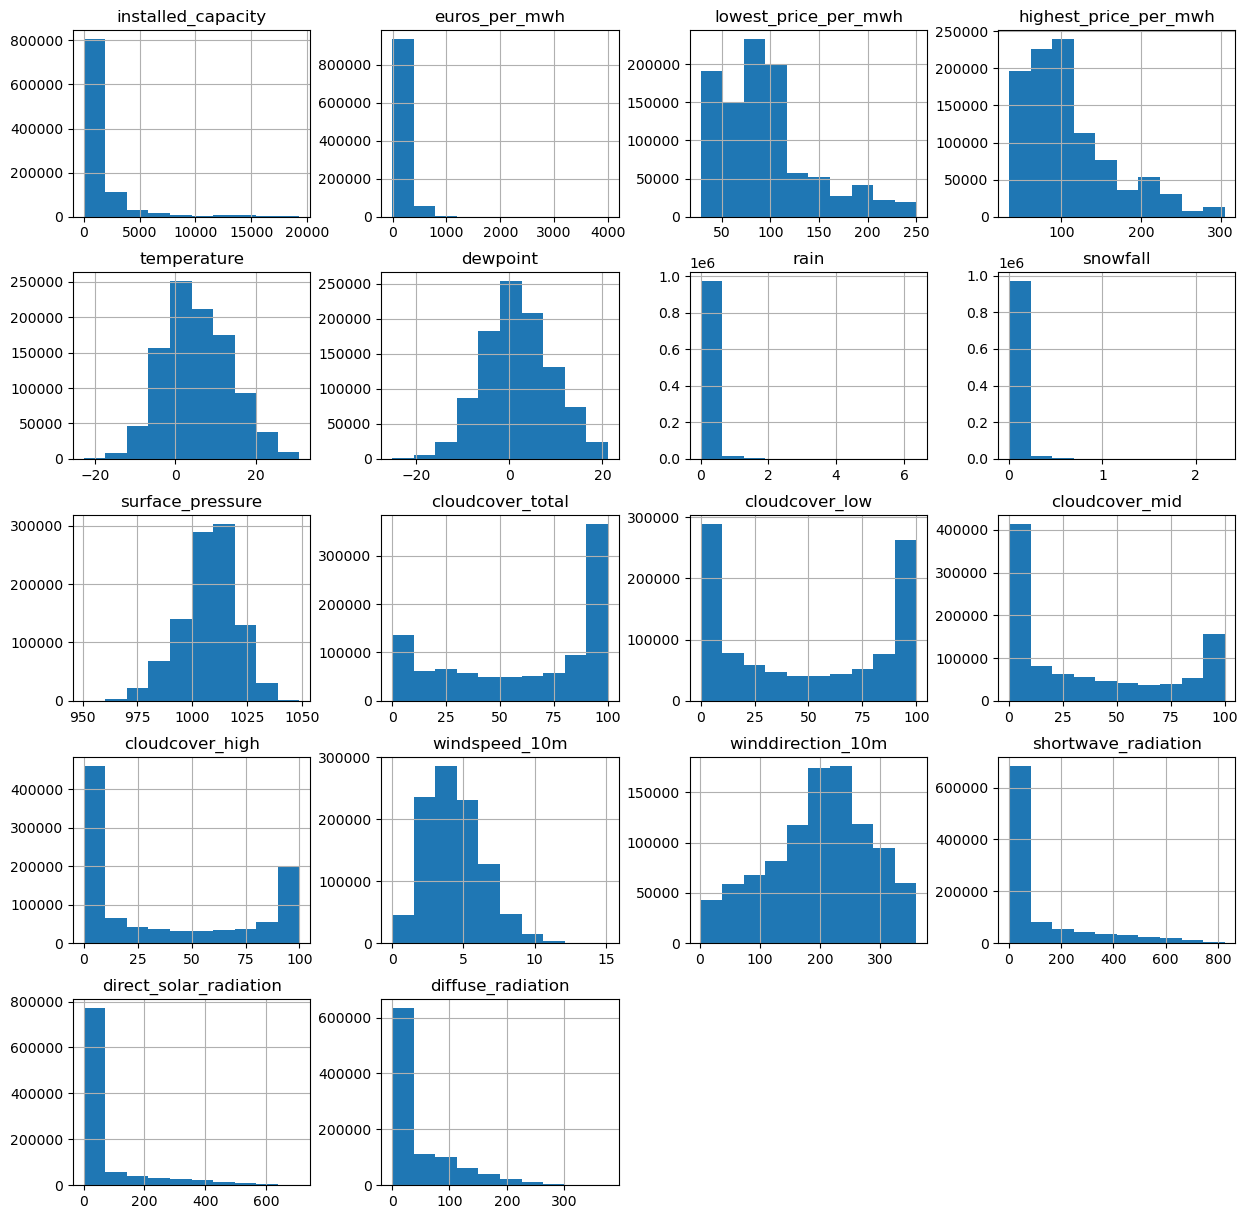

In [18]:
feature.hist(figsize = (15,15))

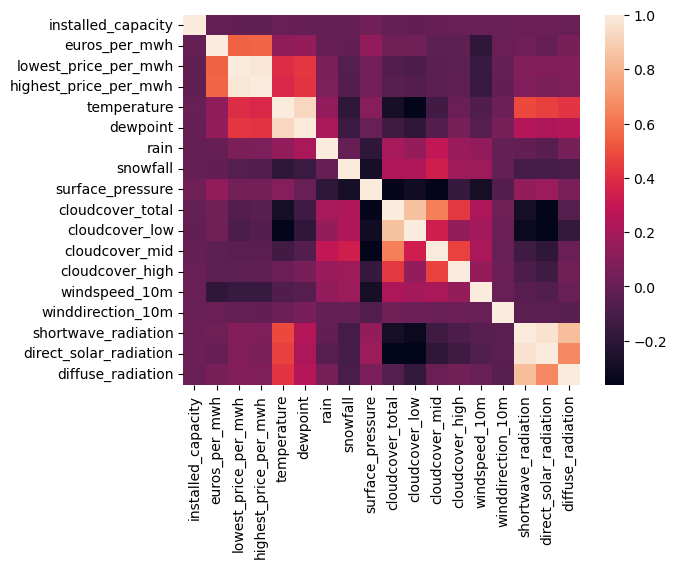

In [19]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt
corrMatrix = feature.corr()
sns.heatmap(corrMatrix) #sns.heatmap(corrMatrix,annot=True) if you want to show the coorelation value on the plot
plt.show()

In [20]:
#firstly, define X, independent variabels
X = np.asarray(feature) #numpy.asarray()function is used when we want to convert input to an array. 
X.shape #we have 21 features

(990401, 18)

In [21]:
y=consumption_df[['target']]

# **SCALING**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# Standardize the data
X_scaled = scaler.fit_transform(feature) 

In [23]:
feature_list = list(feature.columns)
X_scaled=pd.DataFrame(X_scaled,columns=feature_list)
X_scaled = X_scaled.reset_index(drop=True)
X_scaled

,installed_capacity,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation
0,0.049065,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,0.569,0.035,0.039,0.351905,0.949861,0.0,0.0,0.0
1,0.008333,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,0.569,0.035,0.039,0.351905,0.949861,0.0,0.0,0.0
2,0.373010,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,0.569,0.035,0.039,0.351905,0.949861,0.0,0.0,0.0
3,0.020431,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,0.569,0.035,0.039,0.351905,0.949861,0.0,0.0,0.0
4,0.072791,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,0.569,0.035,0.039,0.351905,0.949861,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990396,0.021239,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,0.028,0.164,0.298,0.117118,0.470752,0.0,0.0,0.0
990397,0.105146,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,0.028,0.164,0.298,0.117118,0.470752,0.0,0.0,0.0
990398,0.031825,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,0.028,0.164,0.298,0.117118,0.470752,0.0,0.0,0.0
990399,0.032058,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,0.028,0.164,0.298,0.117118,0.470752,0.0,0.0,0.0


In [24]:
Date=consumption_df[['day','month','year','county','eic_count','hour','is_business','product_type']]
Date = Date.reset_index(drop=True)
Date

,day,month,year,county,eic_count,hour,is_business,product_type
0,1,9,2021,0,108.0,0,0,1
1,1,9,2021,0,17.0,0,0,2
2,1,9,2021,0,688.0,0,0,3
3,1,9,2021,0,5.0,0,1,0
4,1,9,2021,0,43.0,0,1,1
...,...,...,...,...,...,...,...,...
990396,29,5,2023,15,51.0,23,0,1
990397,29,5,2023,15,161.0,23,0,3
990398,29,5,2023,15,15.0,23,1,0
990399,29,5,2023,15,20.0,23,1,1


In [25]:
combine=pd.concat([X_scaled,Date],axis=1)
combine

,installed_capacity,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,...,direct_solar_radiation,diffuse_radiation,day,month,year,county,eic_count,hour,is_business,product_type
0,0.049065,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,...,0.0,0.0,1,9,2021,0,108.0,0,0,1
1,0.008333,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,...,0.0,0.0,1,9,2021,0,17.0,0,0,2
2,0.373010,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,...,0.0,0.0,1,9,2021,0,688.0,0,0,3
3,0.020431,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,...,0.0,0.0,1,9,2021,0,5.0,0,1,0
4,0.072791,0.025578,0.077197,0.045109,0.682649,0.774771,0.0,0.0,0.610073,0.544,...,0.0,0.0,1,9,2021,0,43.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990396,0.021239,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,...,0.0,0.0,29,5,2023,15,51.0,23,0,1
990397,0.105146,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,...,0.0,0.0,29,5,2023,15,161.0,23,0,3
990398,0.031825,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,...,0.0,0.0,29,5,2023,15,15.0,23,1,0
990399,0.032058,0.021778,0.000270,0.010631,0.633955,0.693908,0.0,0.0,0.540820,0.212,...,0.0,0.0,29,5,2023,15,20.0,23,1,1


In [26]:
X = np.asarray(combine)

# **SPLIT THE DATA**

In [27]:
from sklearn.model_selection import train_test_split
#split data in one go, using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=4)
#random_state is like set.seed() in R

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (792320, 26) (792320,)
Test set: (198081, 26) (198081,)


# **DECISSION TREE**

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 5, max_depth = 5)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=5)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting on the training set
train_pred = dt_reg.predict(X_train)

In [30]:
# Predicting on the test set
test_pred = dt_reg.predict(X_test)

In [31]:
# Evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, train_pred)
mse_train = mean_squared_error(y_train, train_pred)
r2_train = r2_score(y_train, train_pred)

# **Evaluate The Model**

In [32]:
# Evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, test_pred)
mse_test = mean_squared_error(y_test, test_pred)
r2_test = r2_score(y_test, test_pred)


evaluation_metrics = {
    "Training Set": {
        "Mean Absolute Error (MAE)": mae_train,
        "Mean Squared Error (MSE)": mse_train,
        "R-squared": r2_train
    },
    "Test Set": {
        "Mean Absolute Error (MAE)": mae_test,
        "Mean Squared Error (MSE)": mse_test,
        "R-squared": r2_test
    }
}

evaluation_metrics

{'Training Set': {'Mean Absolute Error (MAE)': 169.08651071373848,
  'Mean Squared Error (MSE)': 131100.4259241951,
  'R-squared': 0.9097902350010305},
 'Test Set': {'Mean Absolute Error (MAE)': 170.46802488797053,
  'Mean Squared Error (MSE)': 131607.36415944243,
  'R-squared': 0.9114720176141602}}

In [33]:
from sklearn import tree

In [34]:
feature_names= combine.columns
feature_names

Index(['installed_capacity', 'euros_per_mwh', 'lowest_price_per_mwh',
       'highest_price_per_mwh', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'day', 'month', 'year', 'county', 'eic_count',
       'hour', 'is_business', 'product_type'],
      dtype='object')

In [35]:
df4 = pd.DataFrame({ "f_name":feature_names,
                  "f_value":dt_reg.feature_importances_
})
df4

,f_name,f_value
0,installed_capacity,0.763880
1,euros_per_mwh,0.005843
2,lowest_price_per_mwh,0.000000
3,highest_price_per_mwh,0.000000
4,temperature,0.013935
5,dewpoint,0.000000
6,rain,0.000000
7,snowfall,0.000000
8,surface_pressure,0.000000
9,cloudcover_total,0.000000


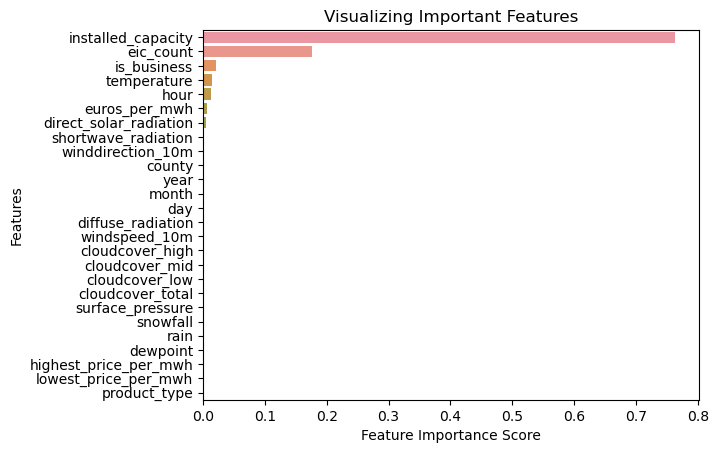

In [36]:
sns.barplot(x='f_value',
            y="f_name", data=df4,
            order=df4.sort_values('f_value',ascending = False).f_name)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [37]:
feature_list = list(combine.columns)
# Dates of training values
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': target})
true_data['date'] = pd.to_datetime(true_data['date'])
true_data

,date,actual
1,2021-09-01,96.590
3,2021-09-01,17.314
5,2021-09-01,656.859
7,2021-09-01,59.000
9,2021-09-01,501.760
...,...,...
1980793,2023-05-29,37.058
1980795,2023-05-29,110.621
1980797,2023-05-29,188.167
1980799,2023-05-29,31.484


In [38]:
# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': test_pred})
predictions_data['date'] = pd.to_datetime(predictions_data['date'])
predictions_data

,date,prediction
0,2022-04-14,173.264076
1,2023-05-03,22.479803
2,2022-08-15,65.615579
3,2023-03-24,689.427530
4,2021-09-14,22.479803
...,...,...
198076,2021-12-23,529.590873
198077,2022-07-31,134.558417
198078,2022-04-13,689.427530
198079,2021-09-10,173.264076


[Text(0.5, 1.0, 'Consumption Levels'), Text(0, 0.5, 'kWh')]

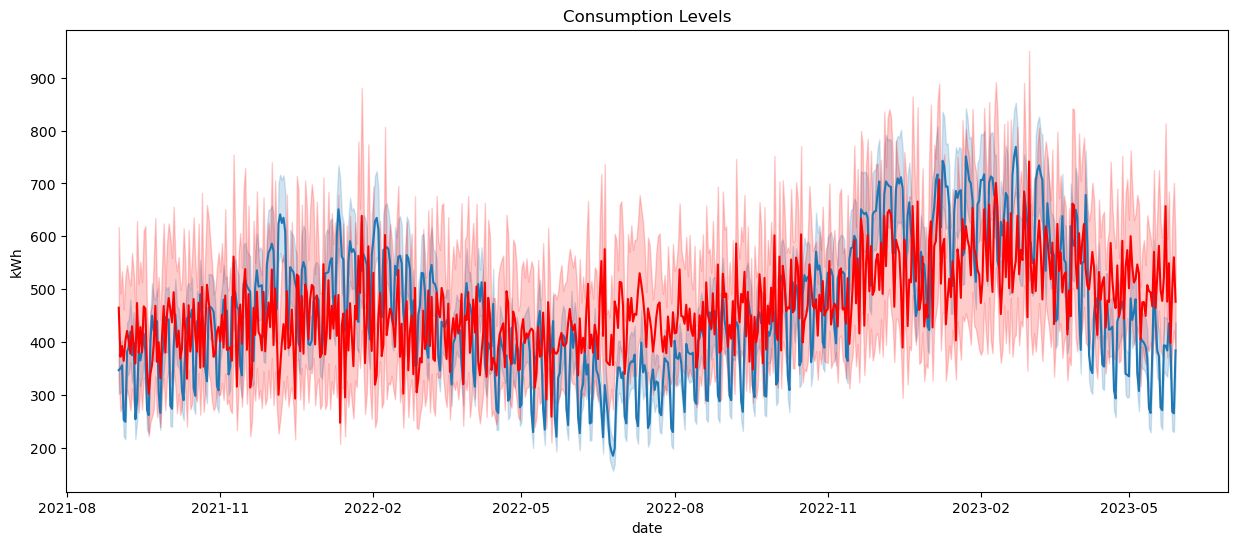

In [39]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data = true_data, x = 'date', y = 'actual')
sns.lineplot(data=predictions_data, x='date', y='prediction', color='red')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set(title = "Consumption Levels", ylabel = 'kWh')

# **K-CROSS VALIDATION**

In [40]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv 

KFold(n_splits=10, random_state=1, shuffle=True)

In [42]:
# evaluate model based on Cross validation. This step may take some time. 
dtree_r2 = cross_val_score(dt_reg, X, target, scoring='r2', cv=cv)
# n_jobs=-1 can significantly speed up the fitting process for large datasets or complex models
dtree_MAE = cross_val_score(dt_reg, X, target, scoring='neg_mean_absolute_error', cv=cv)
dtree_MSE = cross_val_score(dt_reg, X, target, scoring='neg_mean_squared_error', cv=cv)

# report performacne
print('R2: %.3f (%.3f)' % (mean(dtree_r2), std(dtree_r2)),
      'MAE: %.3f (%.3f)' % (mean(dtree_MAE), std(dtree_MAE)),
      'MSE: %.3f (%.3f)' % (mean(dtree_MSE), std(dtree_MSE)),
     )

R2: 0.909 (0.002) MAE: -169.593 (1.059) MSE: -132117.648 (2590.146)


# **HYPER TUNING PARAMETER**

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
dt= DecisionTreeRegressor()
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [129]:
params = {'criterion': ['squared_error', 'poisson', 'absolute_error'],
           'min_samples_leaf':[3,10,20],
          'min_samples_split':[10,20,50]
         }
grid_dt = GridSearchCV ( dt, params, n_jobs=-1)
grid_dt.fit(X_train, y_train)